In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
    df = pd.read_csv(filename)
    print(df.shape)
    df['Label'] = df['Label'].apply(lambda x: x.strip().lower())
    return df

In [3]:
# training csv is 90% of 18000 dataset model 1 - transformed
# testing csv is 10% of 18000 dataset model 1 - transformed

FILE_HO_TRAIN = 'training.csv'
FILE_HO_TEST = 'testing.csv'

In [4]:
df_ho_train = read_file(FILE_HO_TRAIN)
df_ho_test = read_file(FILE_HO_TEST)

(14400, 7)
(3600, 7)


In [5]:
target_encoder = LabelEncoder()
df_ho_train['Target'] = target_encoder.fit_transform(df_ho_train['Label'])
df_ho_test['Target'] = target_encoder.transform(df_ho_test['Label'])

In [6]:
x_ho_train = df_ho_train.drop(['Label', 'Target'], axis=1)
y_ho_train = df_ho_train['Target']

x_ho_test = df_ho_test.drop(['Label', 'Target'], axis=1)
y_ho_test = df_ho_test['Target']

In [7]:
model = DecisionTreeClassifier()
model.fit(x_ho_train, y_ho_train)
model.score(x_ho_train, y_ho_train)
predicted= model.predict(x_ho_test)
	
accuracy_ho = accuracy_score(predicted, y_ho_test) * 100
print('Akurasi pada Algoritma Decision Tree menggunakan split dengan persentase 90:10 = %s' % accuracy_ho)


Akurasi pada Algoritma Decision Tree menggunakan split dengan persentase 90:10 = 99.97222222222221


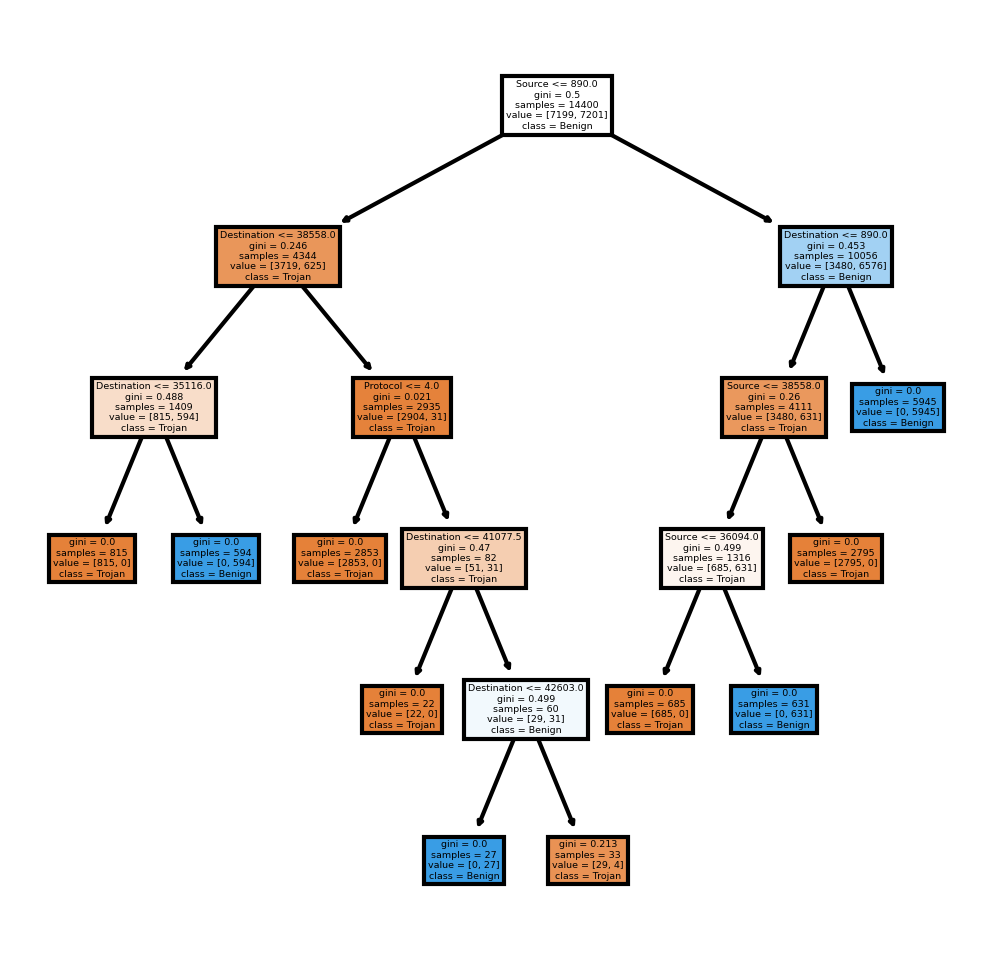

In [8]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(x_ho_train, y_ho_train)
# plot_tree(clf);

fn=['Source','Destination','Protocol','Length','Type','Duration']
cn=['Trojan', 'Benign']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

# plt.savefig('out.pdf')

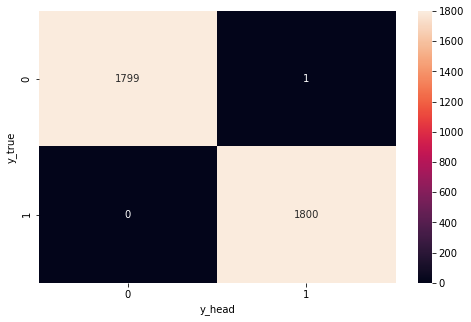

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
confusion_matrix(y_ho_test, predicted) 

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_ho_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [12]:
from sklearn.metrics import classification_report
print (classification_report(y_ho_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1800
           1       1.00      1.00      1.00      1800

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600

